In [16]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import scipy.fftpack as ff

# from sklearn.gaussian_process import GaussianProcess

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
ingnored_dates = set([dt.date(2015, 3, 7), dt.date(2015, 3, 8), dt.date(2015, 2, 13), dt.date(2015, 2, 14), dt.date(2015, 1, 6), dt.date(2015, 1, 7), dt.date(2015, 4, 11), 
                  dt.date(2015, 4, 12), dt.date(2015, 2, 22), dt.date(2015, 2, 23), dt.date(2015, 5, 8), dt.date(2015, 5, 9), dt.date(2015, 1, 25), dt.date(2015, 1, 18), 
                  dt.date(2015, 1, 19), dt.date(2015, 3, 31), dt.date(2015, 4, 1), dt.date(2015, 6, 20), dt.date(2015, 6, 21), dt.date(2015, 7, 8), dt.date(2015, 5, 11), 
                  dt.date(2015, 5, 12), dt.date(2015, 7, 11), dt.date(2015, 1, 13), dt.date(2015, 1, 14), dt.date(2015, 4, 30), dt.date(2015, 5, 1), dt.date(2015, 11, 29), 
                  dt.date(2015, 2, 20), dt.date(2015, 10, 5), dt.date(2015, 5, 15), dt.date(2015, 3, 26), dt.date(2015, 5, 28), dt.date(2015, 10, 25), dt.date(2015, 1, 1), 
                  dt.date(2015, 11, 10), dt.date(2015, 11, 21), dt.date(2015, 9, 1), dt.date(2015, 6, 1), dt.date(2015, 7, 25), dt.date(2015, 6, 12), dt.date(2015, 8, 9), 
                  dt.date(2015, 2, 17), dt.date(2015, 9, 27), dt.date(2015, 7, 31), dt.date(2015, 3, 27), dt.date(2015, 9, 28)])

In [21]:
lines = []
with open("/Users/anokhin/Desktop/presents_2015_1x_N_1M.txt") as tlf:
    for line in tlf:
        uid, json_str = line.strip().split("\t")
        
#         if uid.startswith("B:"):
#             continue
        
        json = ujson.loads(json_str)
        
        data = {"uid": uid}
        for day, stats in json:            
            date = dt.datetime.strptime(day, "%Y%m%d").date()
            
            if date in ingnored_dates:
                continue
            
            for price_str, count in stats.iteritems():
                price = int(price_str)
                data[price] = data.get(price, 0) + count
                
        lines.append(data)
        
#         if len(lines) > 100000:
#             break

dates = [dt.date(2015, 10, 1) + dt.timedelta(days=i) for i in xrange(31)]
df = pd.DataFrame(lines, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
uid,,,,,,,,,,,,,,,,,,,,,
N:477572420068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:540871725975,11,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:535924413189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:552389804601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:557086936215,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


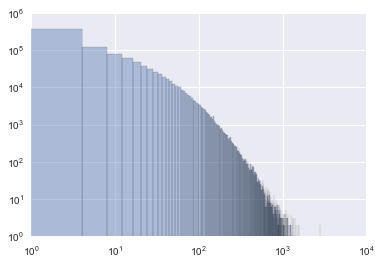

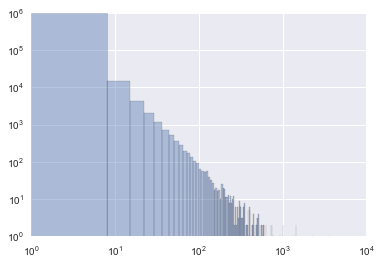

In [52]:
sns.distplot(df.sum(axis=1), kde=False, rug=False, bins=1000)
pl.gca().set_xscale('log')
pl.gca().set_yscale('log')
pl.show()

a = 2.4
m = 1e+8
sam = np.random.zipf(a, 1000000)
sns.distplot(sam[sam < 1e+4], kde=False, rug=False, bins=1000)
pl.gca().set_xscale('log')
pl.gca().set_yscale('log')
pl.show()

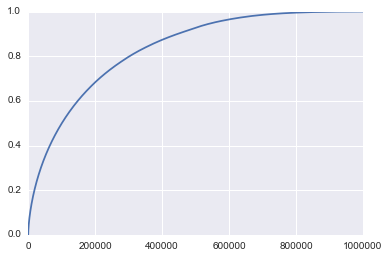

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
uid,,,,,,,,,,,,,,,,,,,,,
N:420864652346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:572679840527,77,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:565272557265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:160402091509,58,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
N:477195672642,134,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
spent = pd.Series(df.values.dot(df.columns.astype(int)), index=df.index)

pl.plot(arange(df.shape[0]), np.cumsum(spent.sort_values(ascending=False)) / spent.sum())
pl.show()

# Take users that generate 80% of income and then sample from them
dfs = df.ix[spent.sort_values(ascending=False).index[:300000]].sample(100000)

dfs.head()

In [58]:
dfs.head().sum(axis=1)

uid
N:420864652346      4
N:572679840527     84
N:565272557265      2
N:160402091509     63
N:477195672642    139
dtype: float64

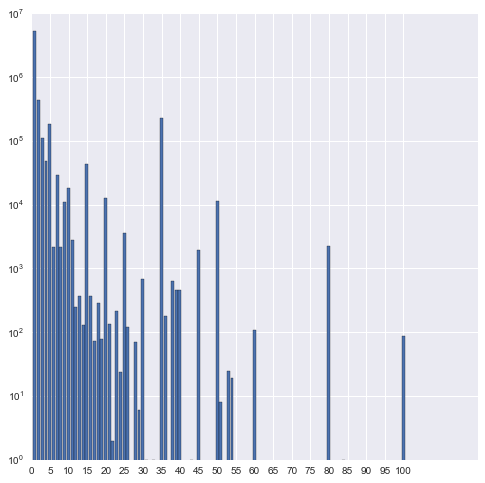

In [56]:
pl.figure(figsize=(8, 8))

pl.bar(np.arange(100) + 0.5, dfs.values.sum(axis=0))
pl.gca().set_yscale('log')
pl.xticks(range(0, 101, 5))

pl.show()

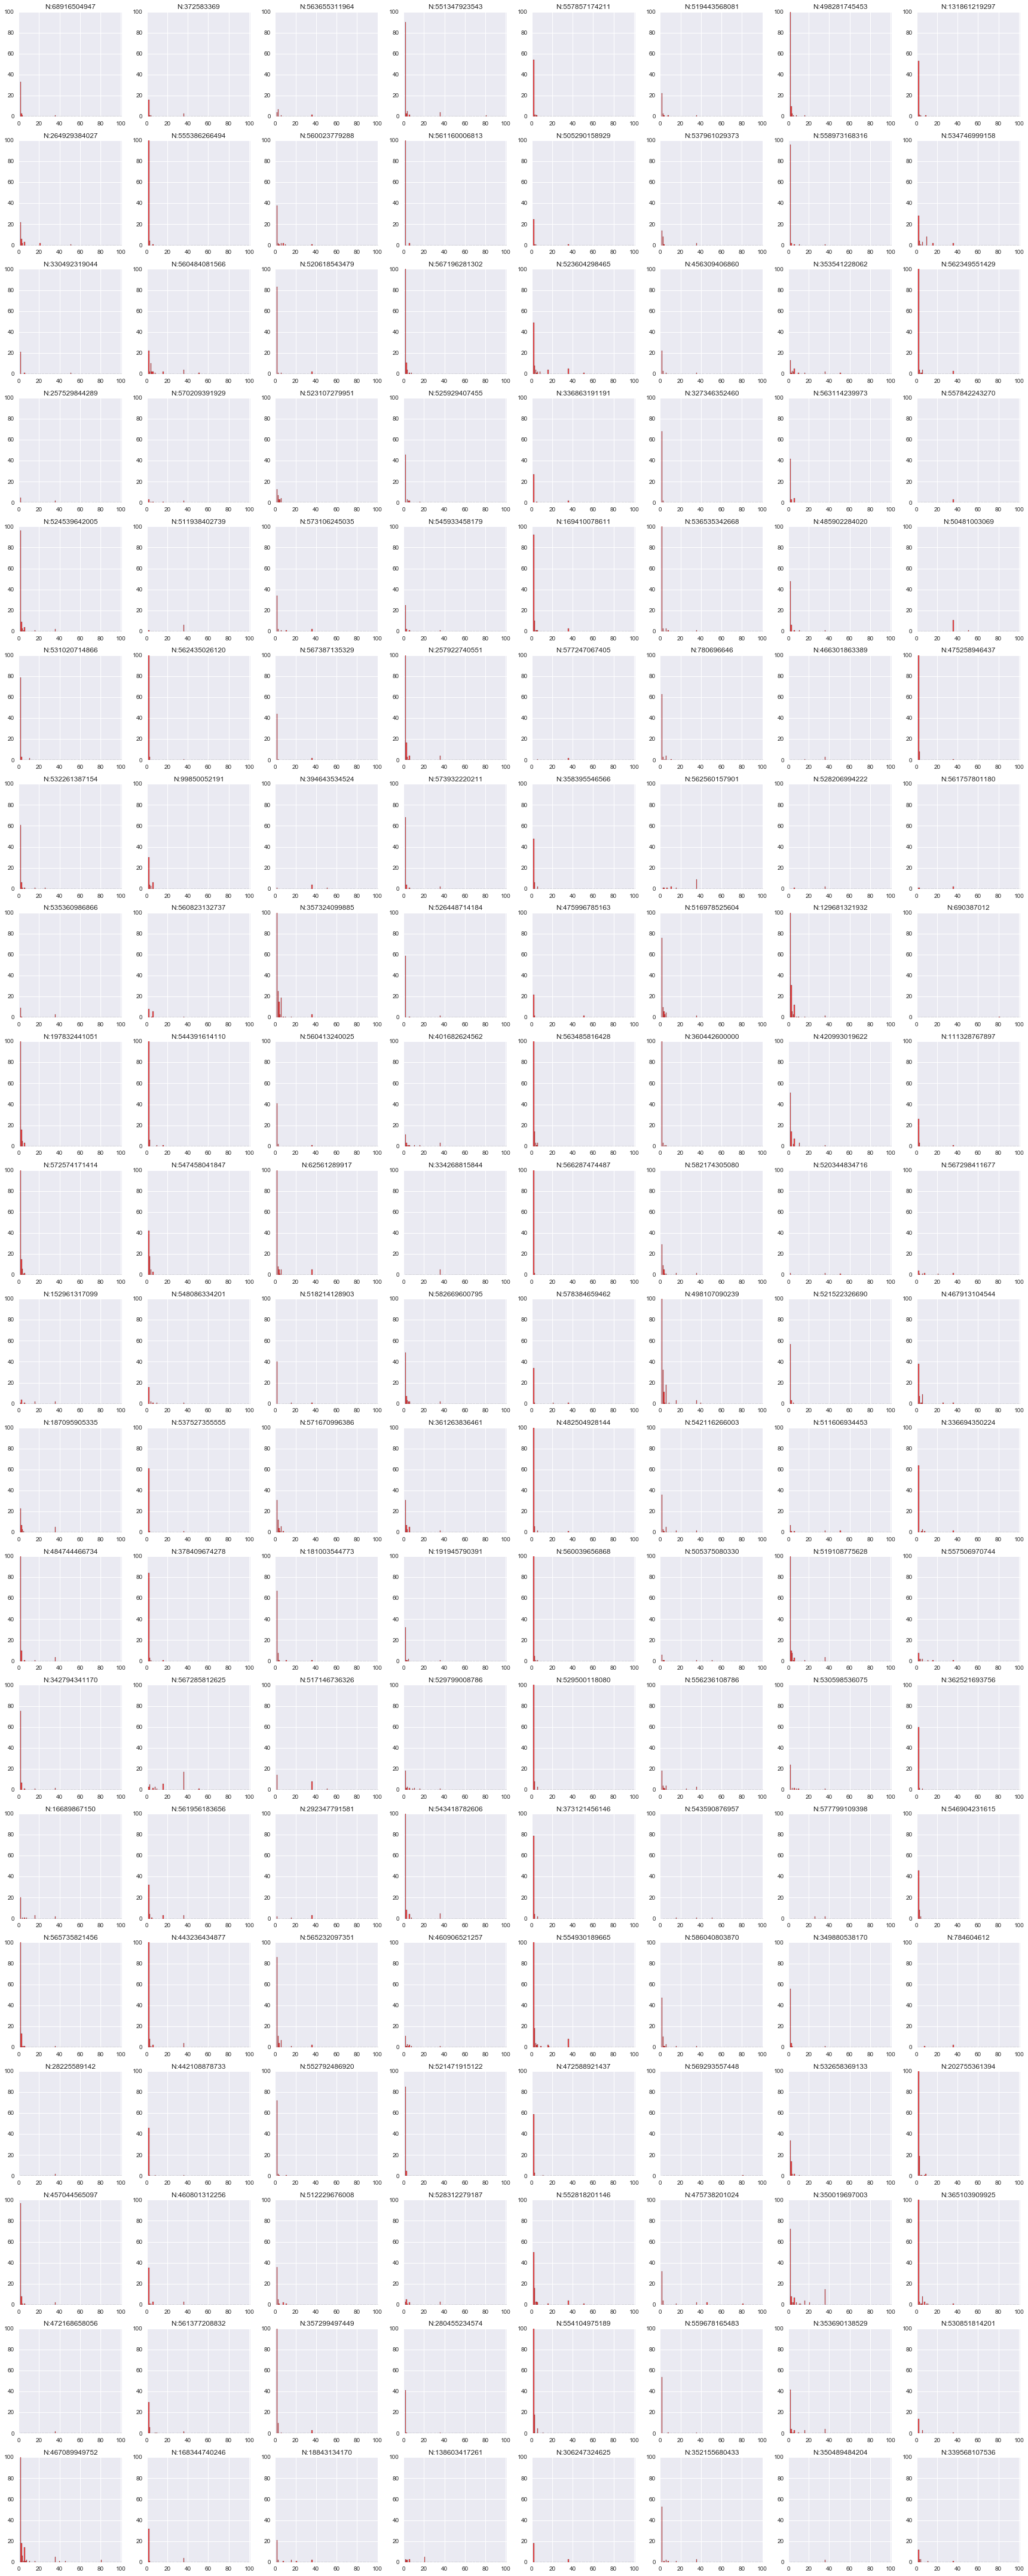

In [57]:
def visualize_dist(dfx, N=None, M=None, color='r'):
    if N is None:
        N = np.ceil(np.sqrt(dfx.shape))
        M = np.ceil(np.sqrt(dfx.shape))

    fig = pl.figure(figsize=(M*3, N*3))

    for i, (uid, row) in enumerate(dfx.sample(N*M).iterrows()):
        ax = pl.subplot(N, M, i + 1)
#         print row.index, row.values
        ax.bar(row.index + 0.5, row.values, color=color, alpha=0.7)
        pl.title(uid)
        pl.xticks(range(0, 101, 20))
        pl.xlim(0, 101)
        pl.ylim(0, 100)
    
    fig.tight_layout()
    pl.show()
    
visualize_dist(dfs[spent > 10], 20, 8)

## PCA

In [38]:
from sklearn import decomposition
from sklearn import manifold
import scipy.cluster.hierarchy as sh

X = 1.0 * np.log1p(dfs.values) / (1e-6 + np.log1p(dfs.values).max(axis=0))

# np.tile((1e-6 + np.log1p(dfs.values).sum(axis=0)), X.shape[0]).reshape(dfs.values.shape)

tsne = manifold.TSNE(n_components=2, learning_rate=500, n_iter_without_progress=100, verbose=2)
Z = tsne.fit_transform(X[:10000])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.3999523, gradient norm = 0.0000535
[t-SNE] Iteration 25: gradient norm 0.000054. Finished.
[t-SNE] Iteration 50: error = 1.3977121, gradient norm = 0.0079373
[t-SNE] Iteration 75: error 

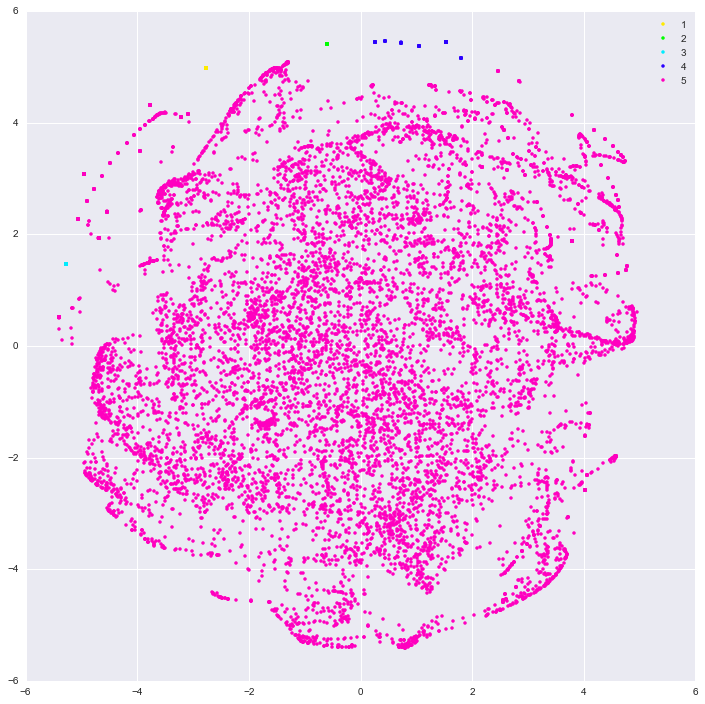

[   0   33   27   33  114 9793]


In [16]:
n_clust = 5
clustering = sh.fclusterdata(Z, n_clust, criterion='maxclust', method='single')

pl.figure(figsize=(12, 12))

cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    pl.plot(Z[clustering==c][:, 0], Z[clustering==c][:, 1], '.', color=cm(int(c*1.0/n_clust*256)), label=str(c))

pl.legend()
pl.show()

print np.bincount(clustering)

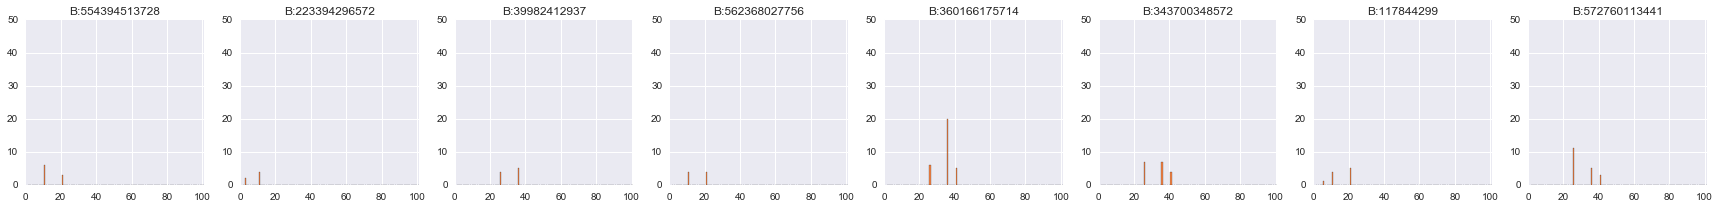

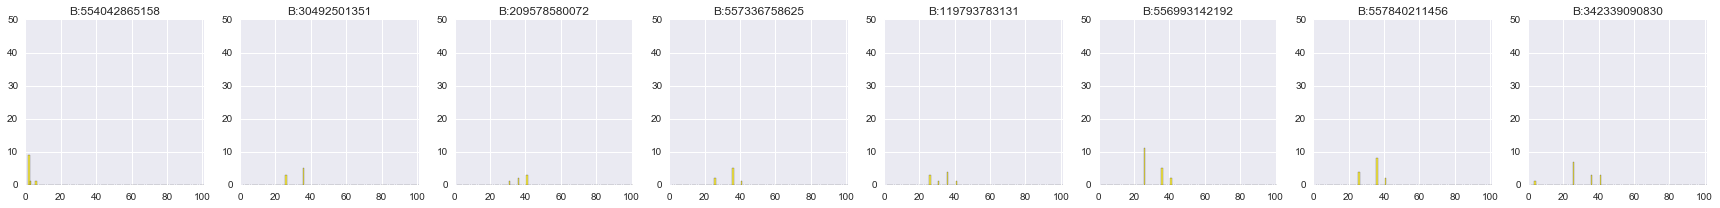

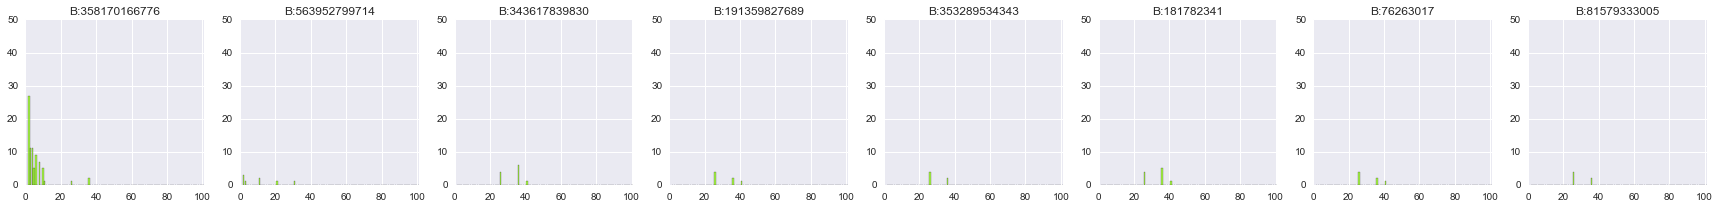

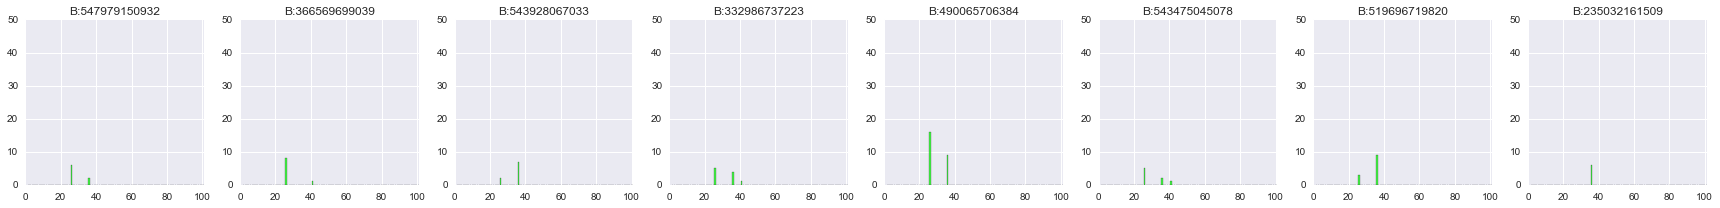

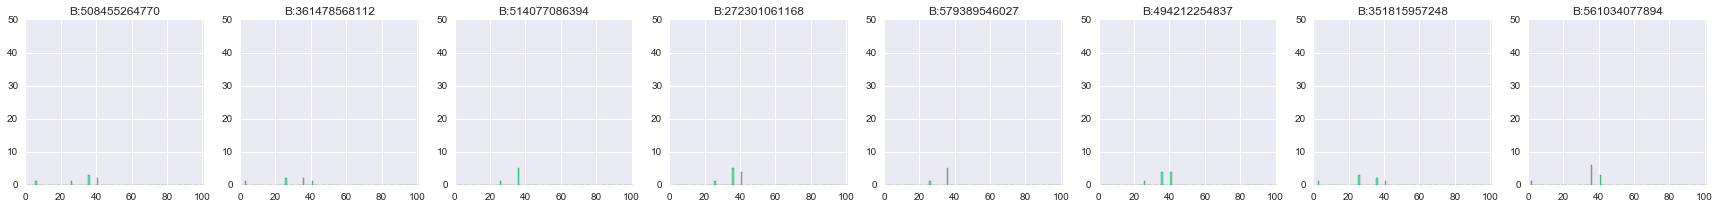

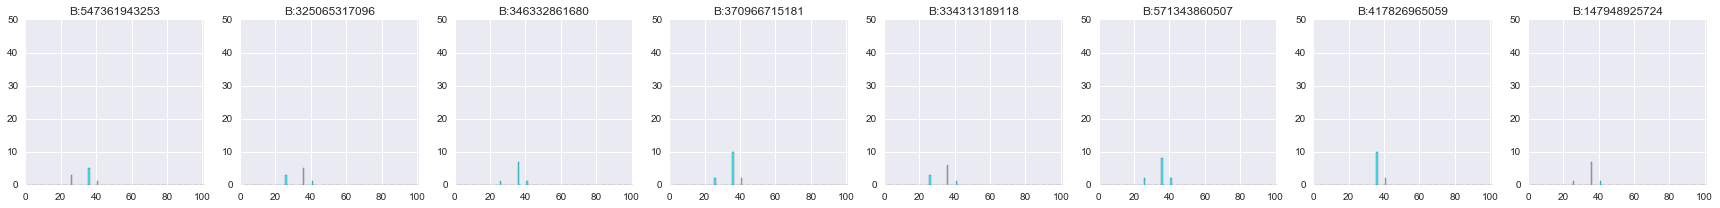

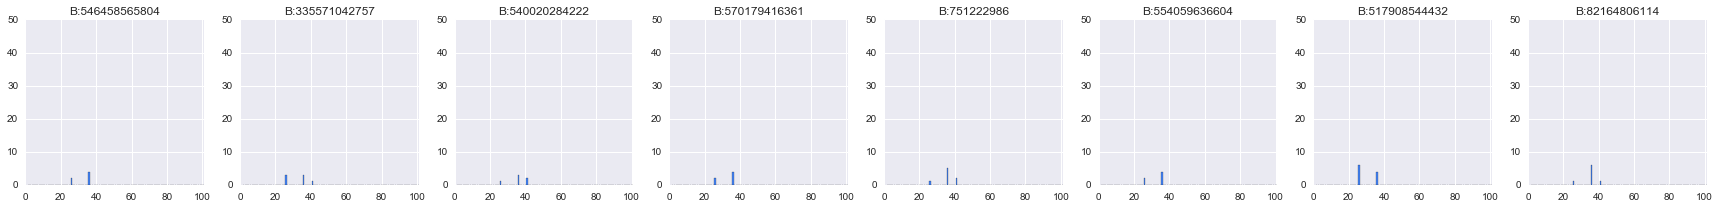

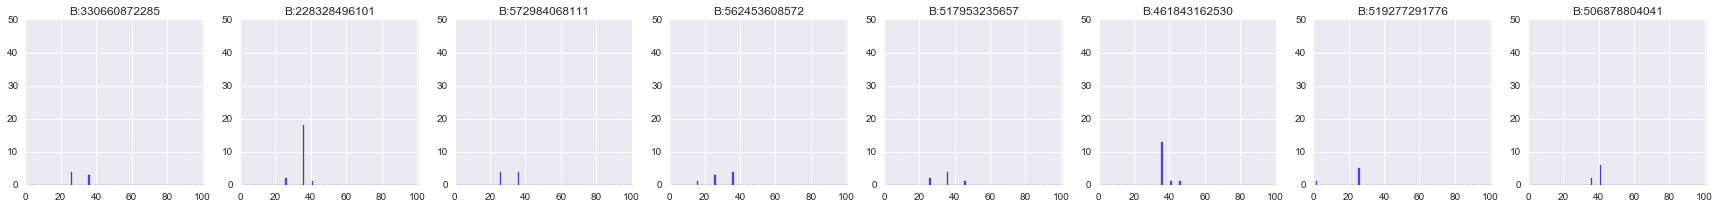

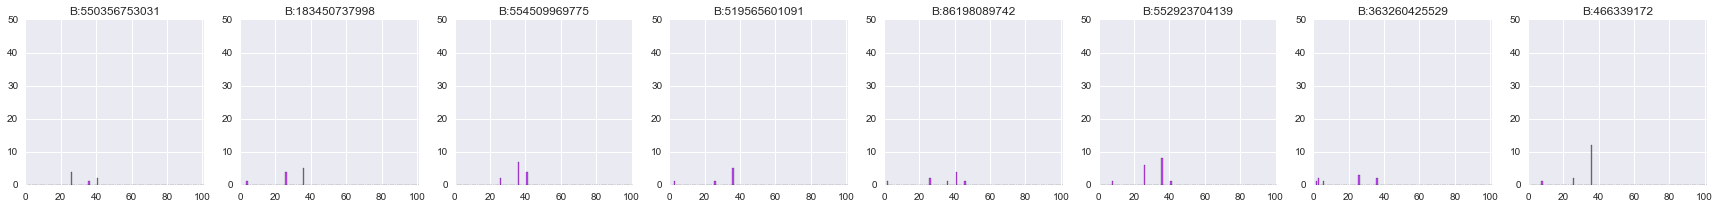

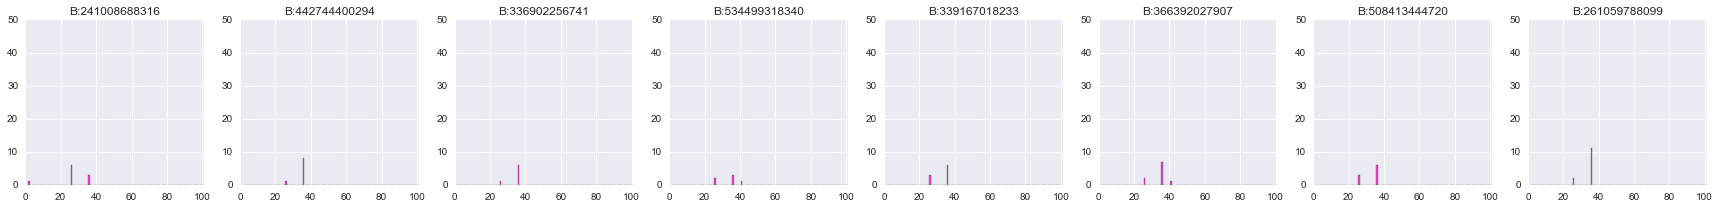

In [17]:
cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    visualize_dist(dfs[:10000][clustering == c], 1, 8, color=cm(int(c*1.0/n_clust*256)))

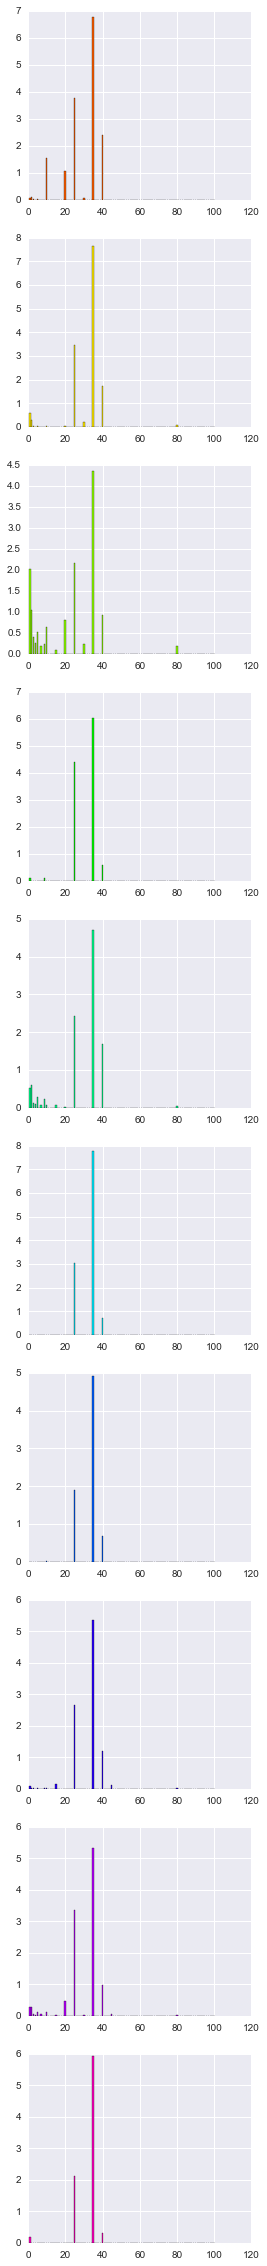

In [19]:
pl.figure(figsize=(4, n_clust * 4))
cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    agg = dfs[:10000][clustering == c].mean(axis=0)
    pl.subplot(n_clust, 1, c)
    pl.bar(np.arange(0, 100) + 0.5, agg.values, color=cm(int(c*1.0/n_clust*256)))
pl.show()